# Отчет: задание 3

*Неверо Андрей, лабораторная работа 1, 2 курс, 4 группа*

В задании требовалось написать программу, которая решает системы линейных уравнений с симметрическими матрицами с помощью LDL-разложения, и сравнить время ее работы с обычным алгоритмом TLU-разложения.

Решением данной задачи можно считать реализацию методов *CountLdlDecomposition_Symmetric* и *SolveSystem_Symmetric* класса Matrix (см. соответствующий заголовочный файл).

Обработка связанных с этим заданием данных вынесена в отдельный класс, определенный в заголовочном файле *Task3*.

## Основная идея алгоритма

Алгоритм LDL-разложения матрицы реализован на базе метода квадратного корня. Алгоритм решения системы линейных уравнений с помощью LDL-разложения также достаточно очевиден и абсолютно аналогичен алгоритму применения TLU-разложения для решения систем линейных уравнений.

## Сравнение времени работы алгоритмов

Проанализируем время решения системы линейных уравнений с помощью TLU-разложения и с помощью LDL-разложения. Для этого воспользуемся функцией *RandomInput* в классе *Task3*.

Данная функция генерирует случайную симметрическую матрицу определенного размера (значения в матрице - возмущенные от $1$ до $5000$), а также вектор $b$, после чего подсчитывает время работы соответствующих алгоритмов по решению СЛАУ для типа *double*.

Данная функция запускалась для матриц размером до $2000$ (с интервалом в $50$). Для каждого размера проводилось 3 теста, подсчитывались средние значения затраченного времени. Полученные результаты можно увидеть ниже. График красного цвета - график работы TLU-алгоритма, синего цвета - LDL-алгоритма. Величины на оси слева - микросекунды.

In [1]:
from data import task3
import matplotlib
%matplotlib inline

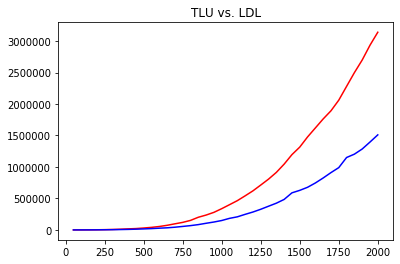

In [2]:
bins = [i for i in range(50, 2001, 50)]
matplotlib.pyplot.title("TLU vs. LDL")
matplotlib.pyplot.plot(bins, task3.double_tlu_time, 'r', bins, task3.double_ldl_time, 'b')
matplotlib.pyplot.show()

Как видно, начиная с матриц размером $n \approx 750$, LDL-алгоритм работает примерно в два раза быстрее, чем TLU-алгоритм. Это легко объяснить: благодаря свойству симметричности мы вычисляем в два раза меньше значений, отсюда и выигрыш во времени.

Отдельно отметим, что производительность рассмотренных алгоритмов можно увеличить, распараллелив отнимание строк внутри них (таким же образом, каким это было сделано в специальном алгоритме для задания 1). Впрочем, разница в производительности между двумя алгоритмами останется ровно той же.